In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

# Шлях до файлу
lifex_file = 'C:/IDA_Ostrovshchuk/Life Expectancy Data.csv'

# Назви стовпців для файлу
lifex_columns = ['Country', 'Year', 'Status', 'Life expectancy',' Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Завантаження файлів у змінні DataFrame
lifex = pd.read_csv(lifex_file, sep=',', header=None, names=lifex_columns, engine='python', skiprows=1, index_col=False)

In [3]:
# Display the first few rows of the DataFrame
print(lifex.head())

# Summary statistics
print(lifex.describe())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing             65.0             263.0   
1  Afghanistan  2014  Developing             59.9             271.0   
2  Afghanistan  2013  Developing             59.9             268.0   
3  Afghanistan  2012  Developing             59.5             272.0   
4  Afghanistan  2011  Developing             59.2             275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0       

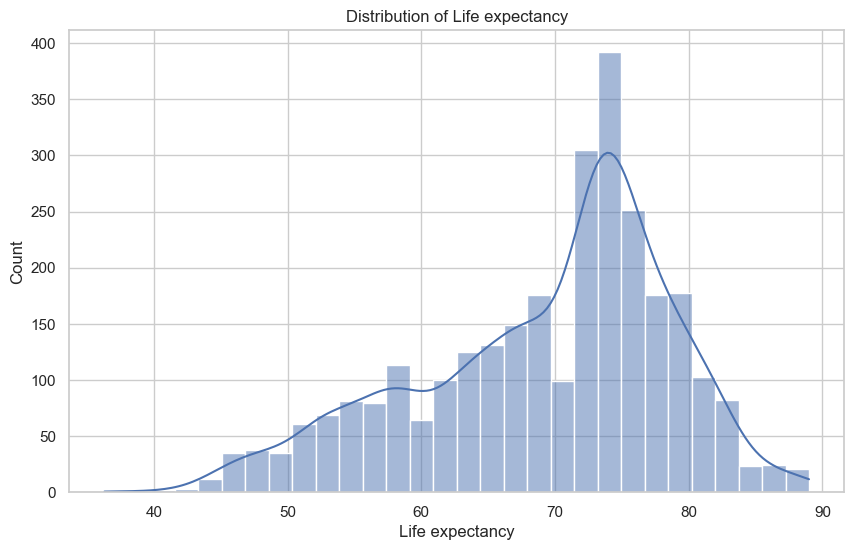

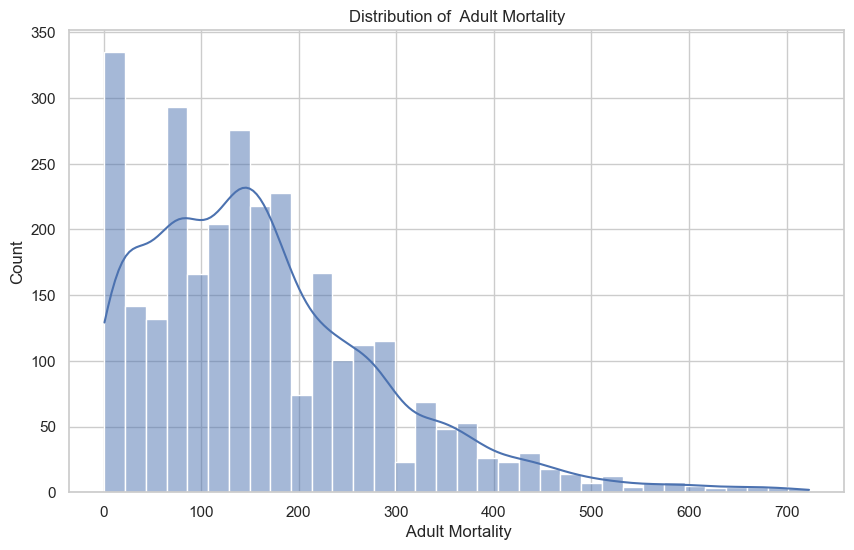

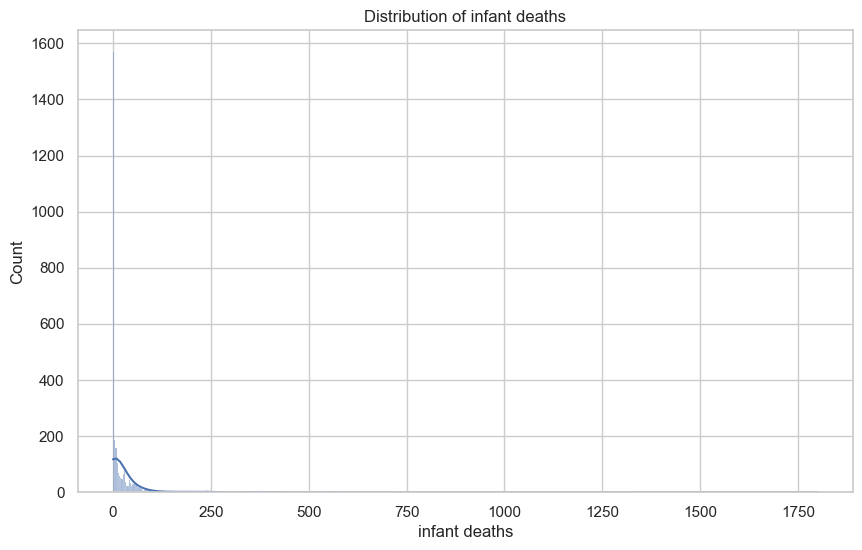

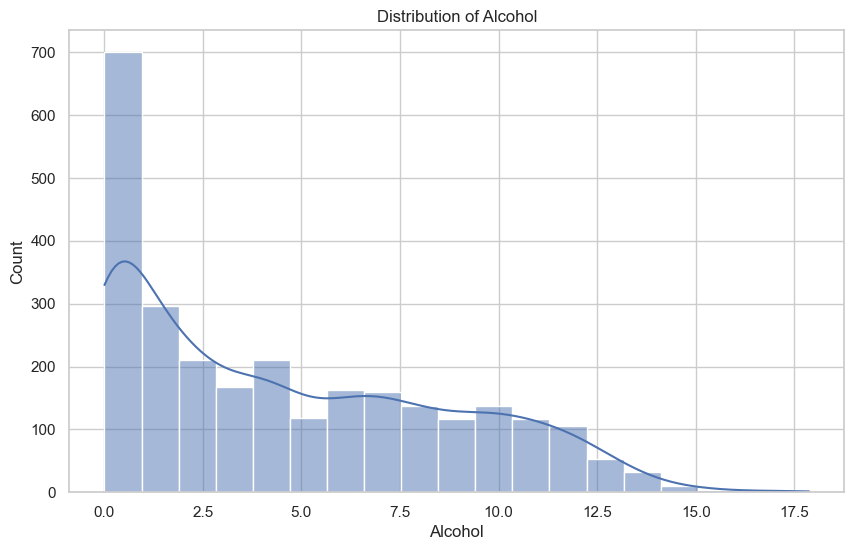

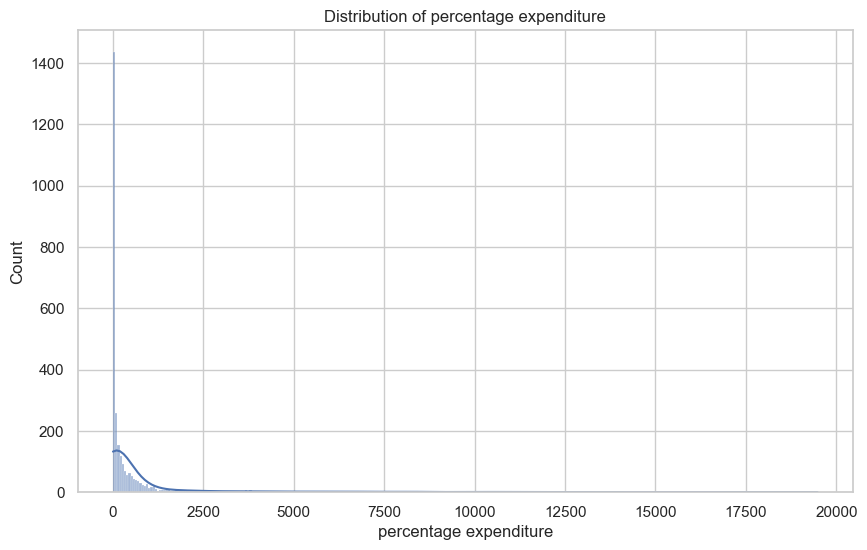

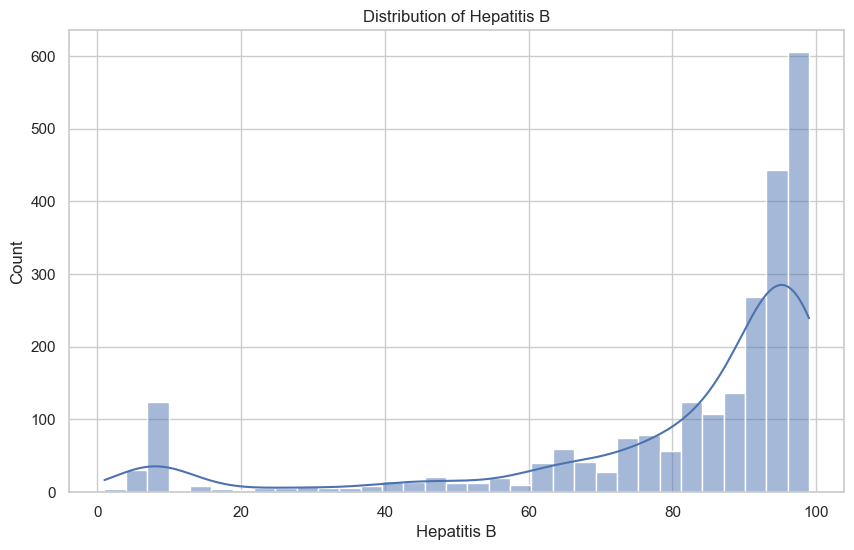

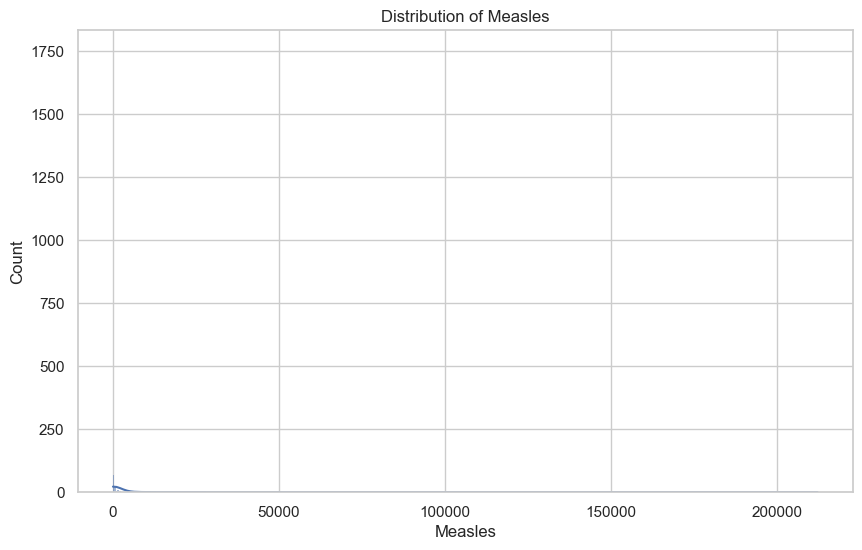

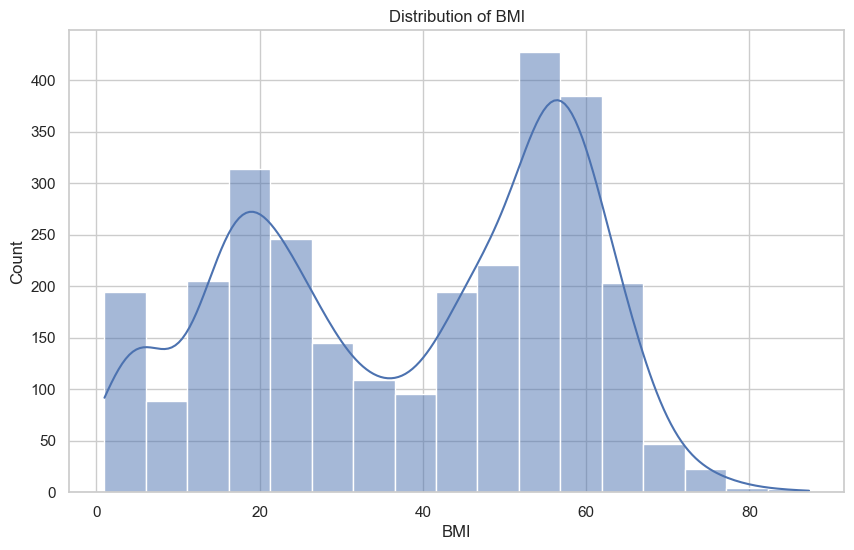

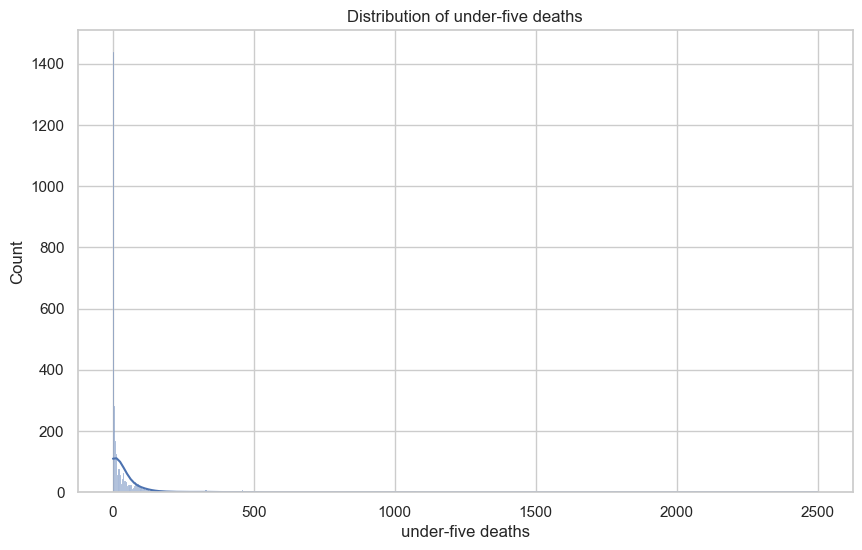

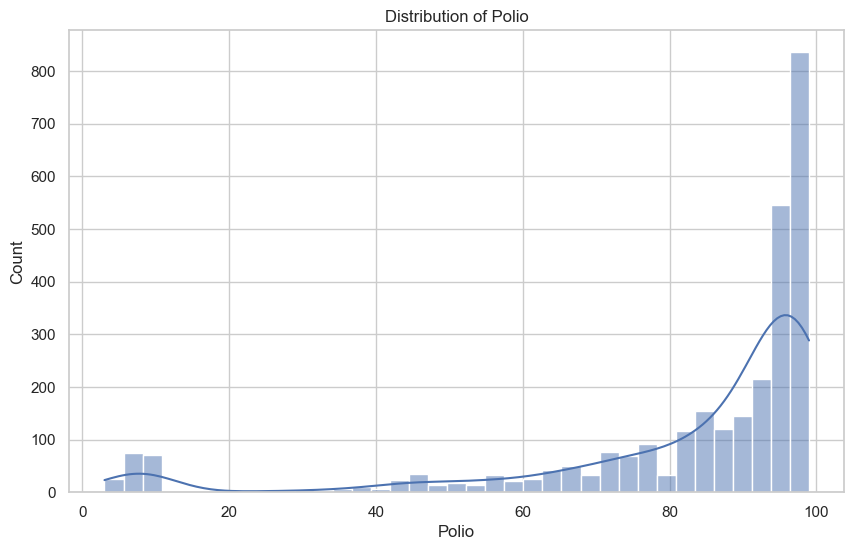

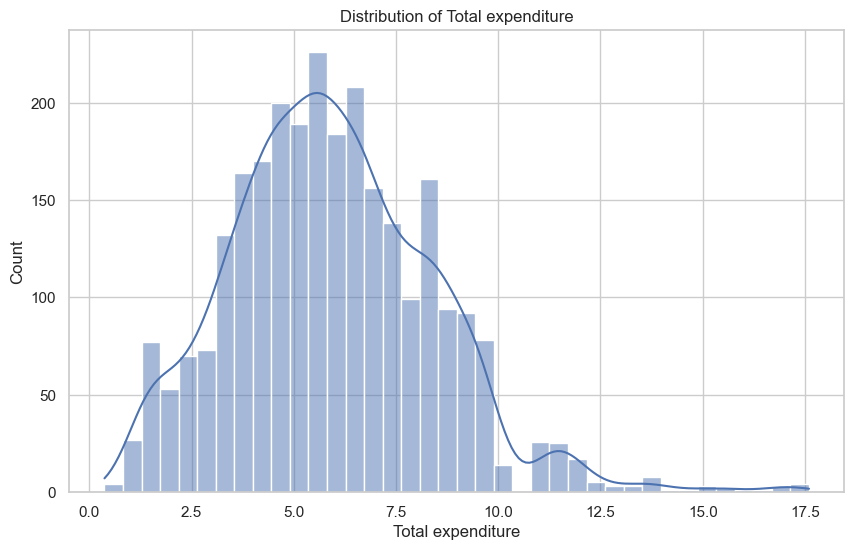

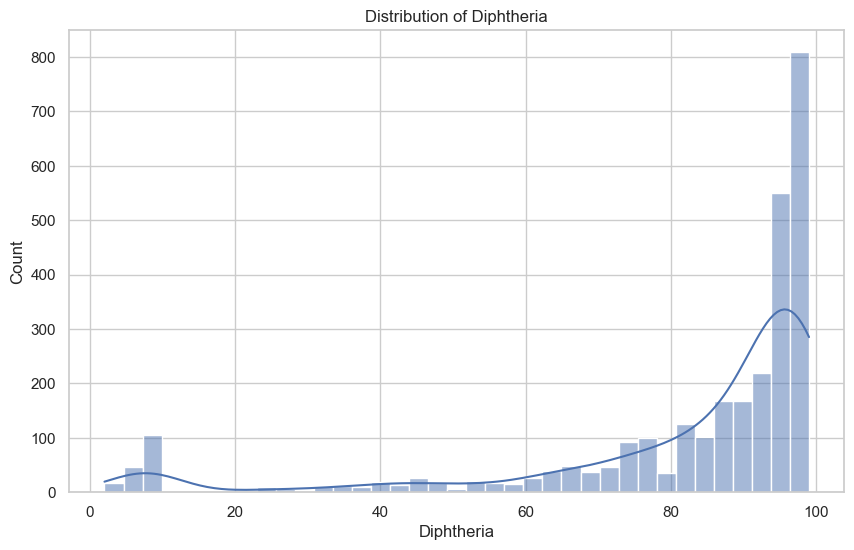

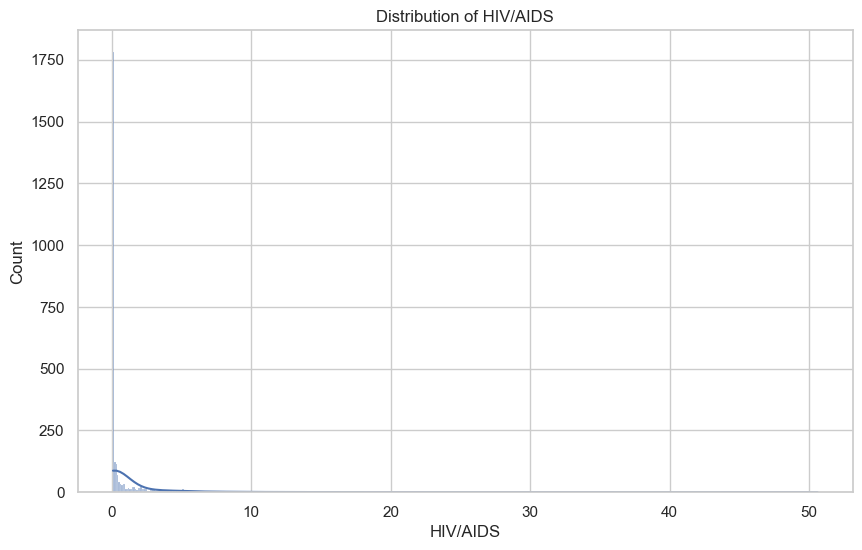

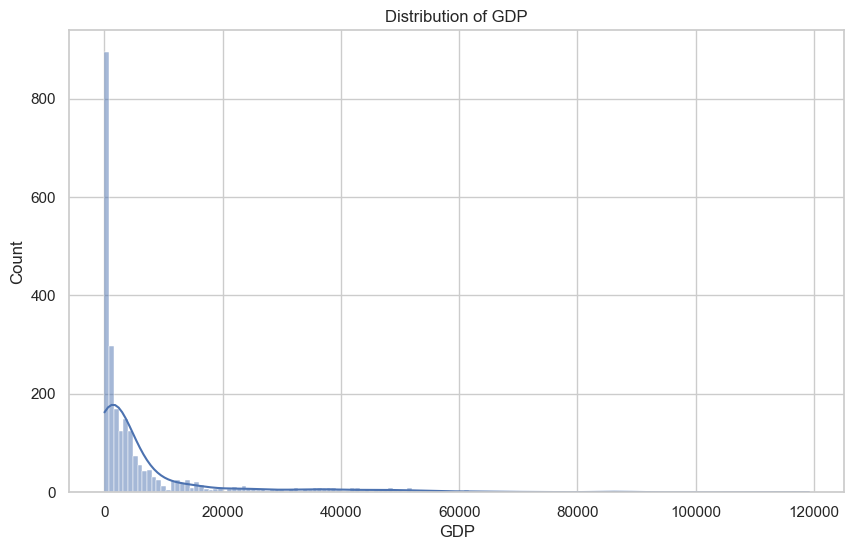

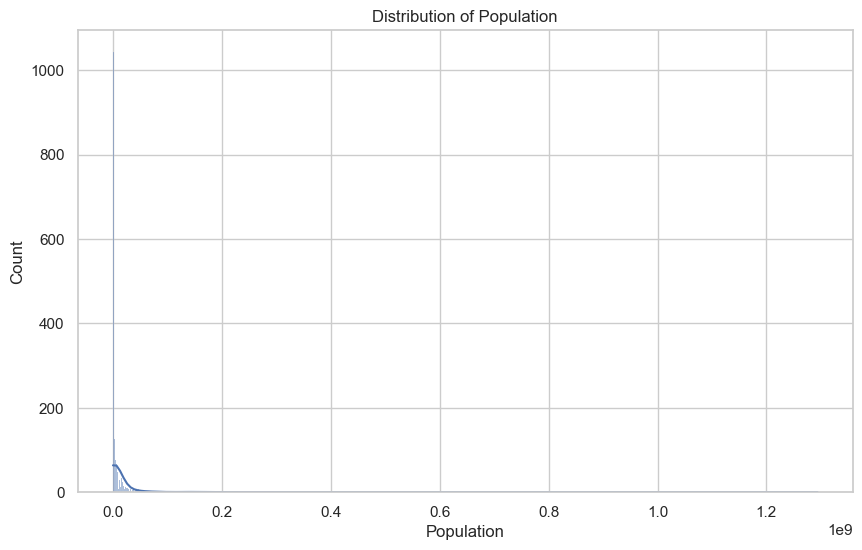

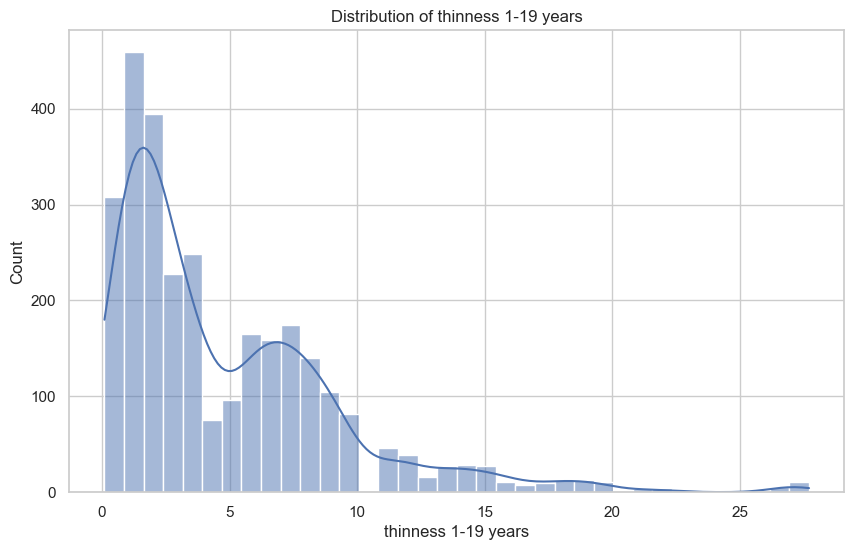

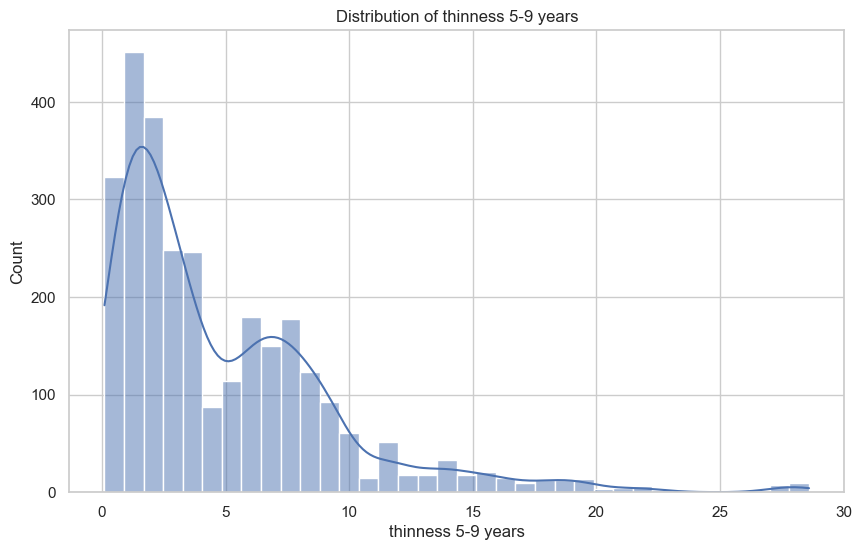

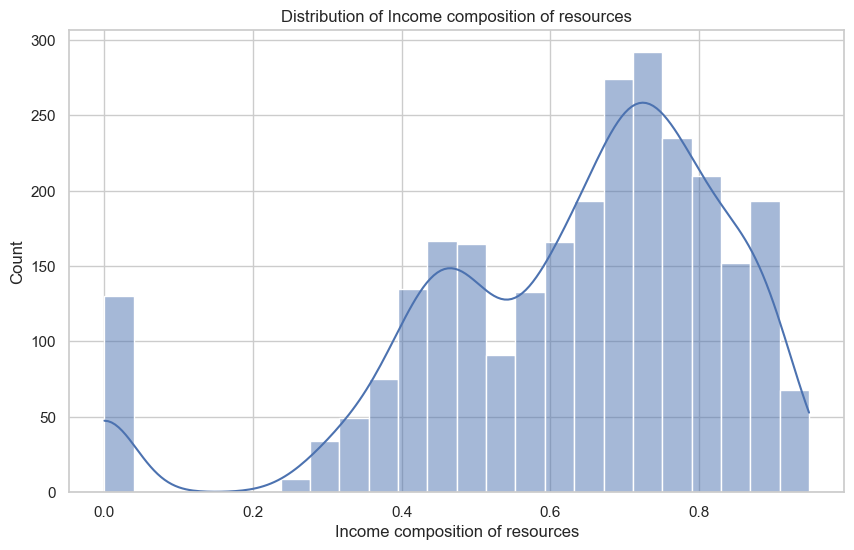

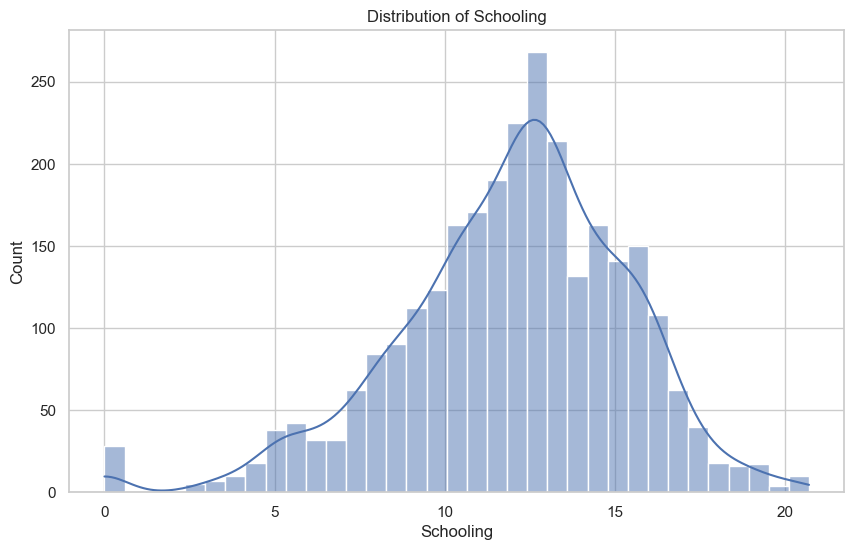

In [4]:
# Встановлюємо стиль графіків
sns.set(style="whitegrid")

# Розподіл для кожного фактора
for column in lifex_columns[3:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(lifex[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

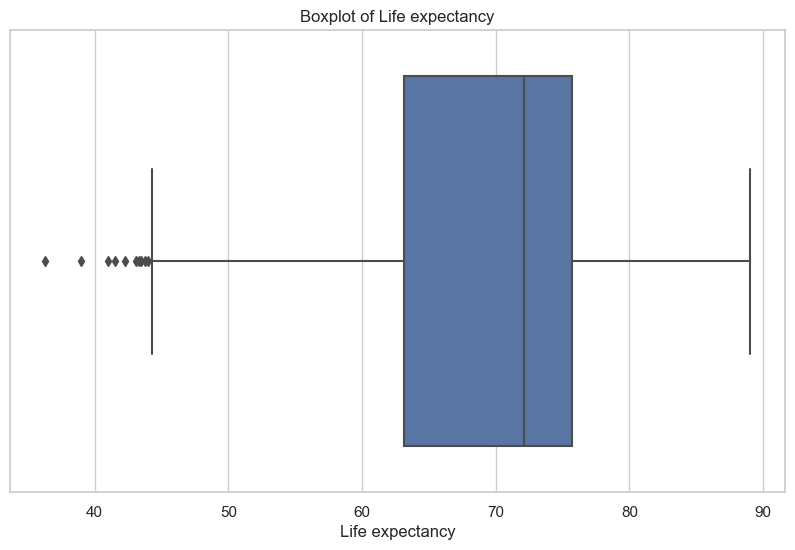

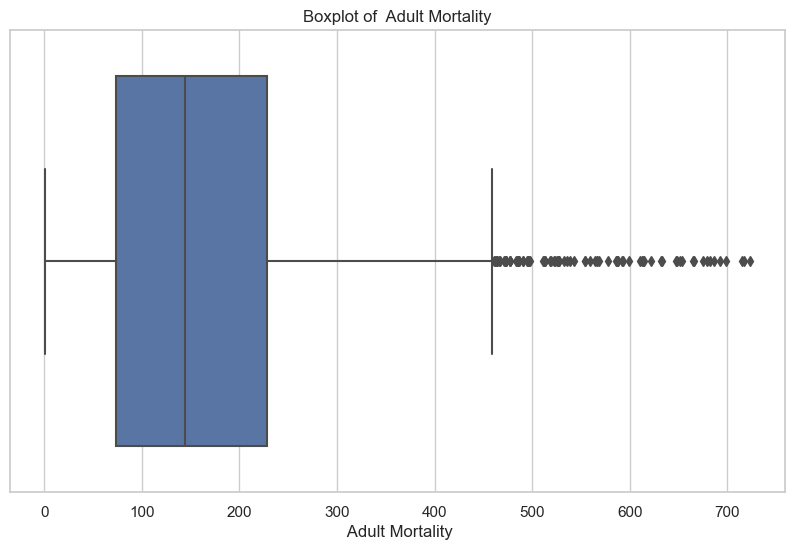

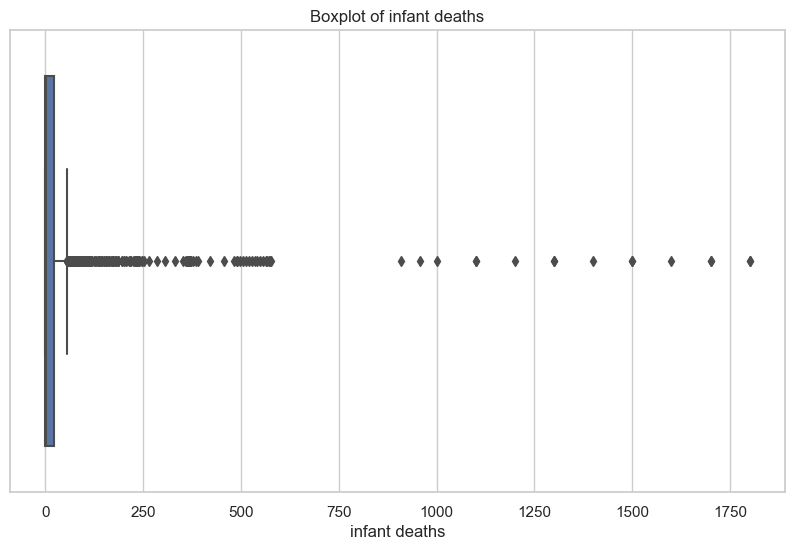

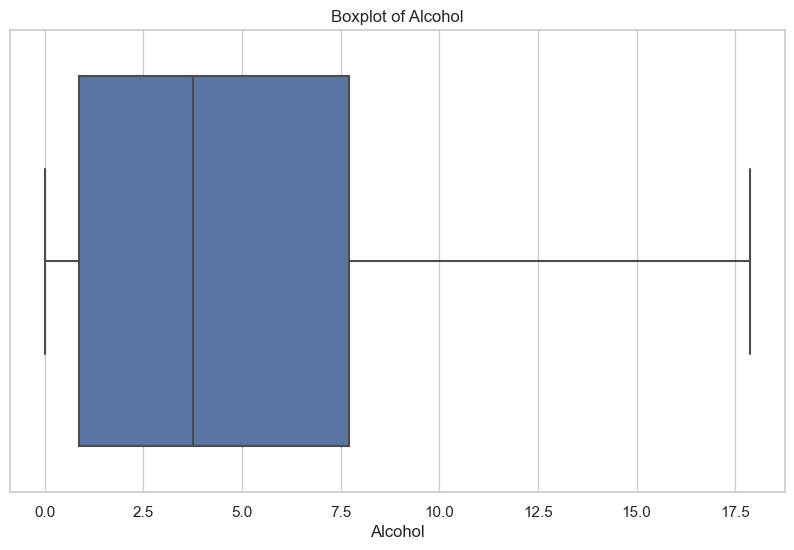

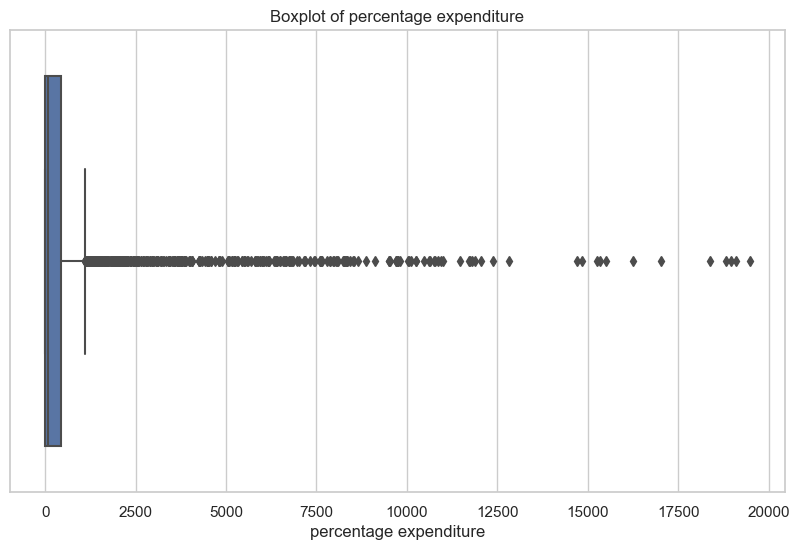

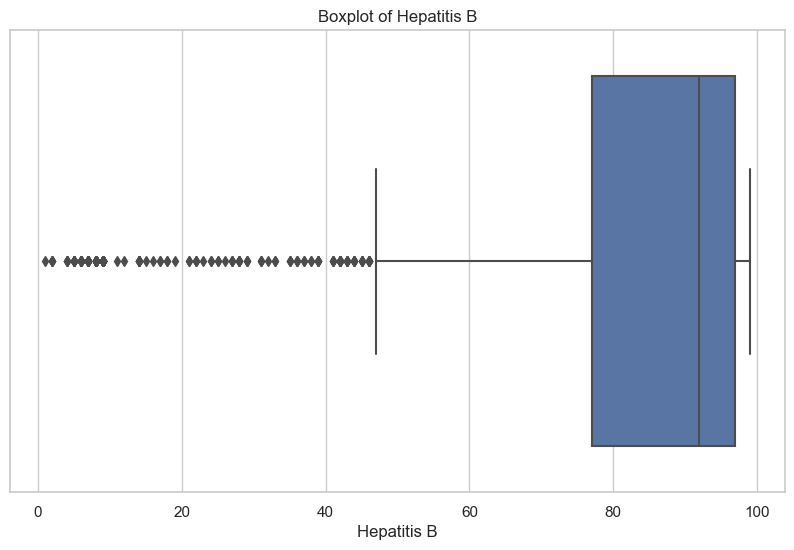

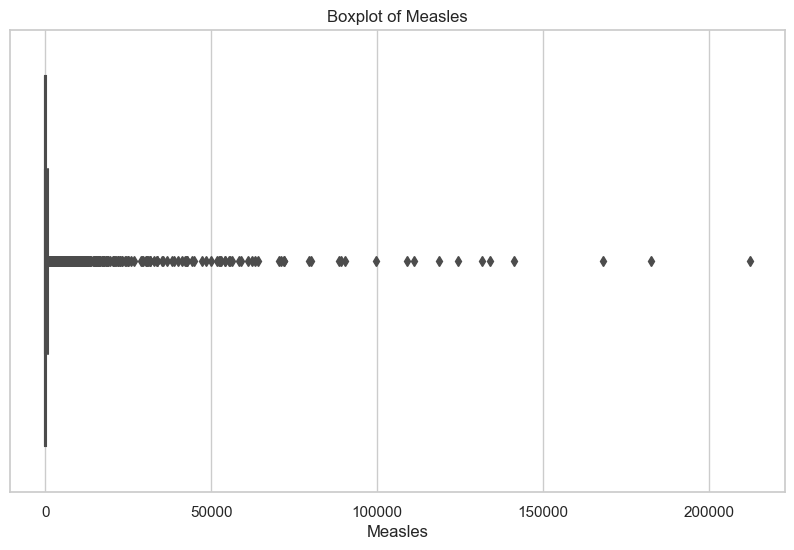

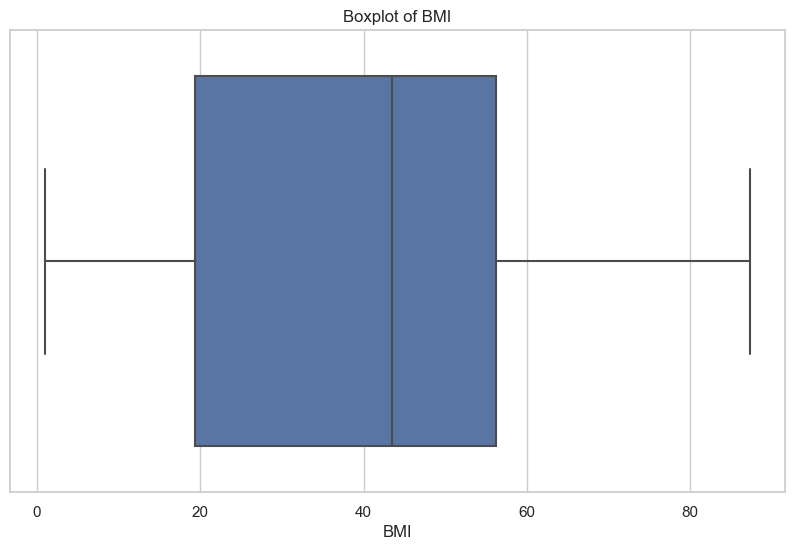

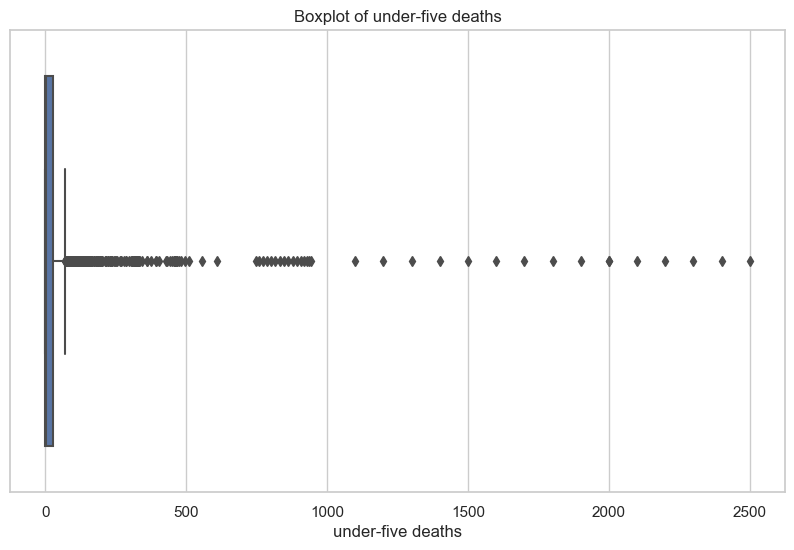

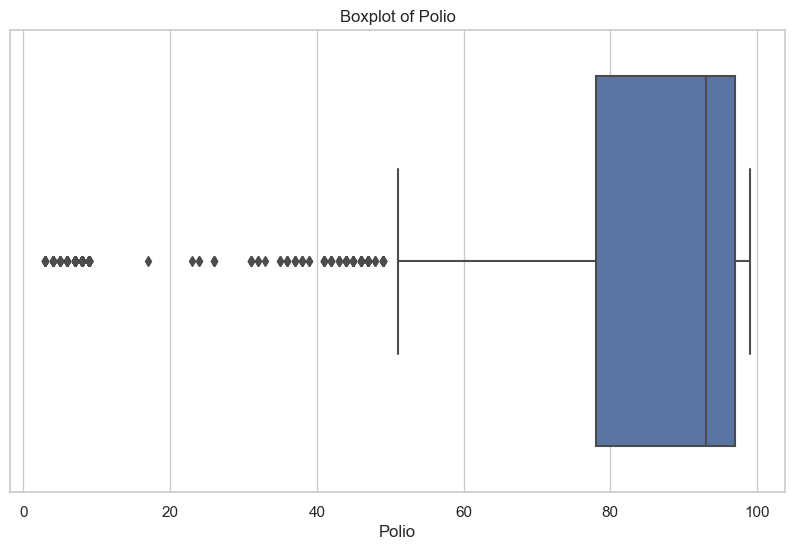

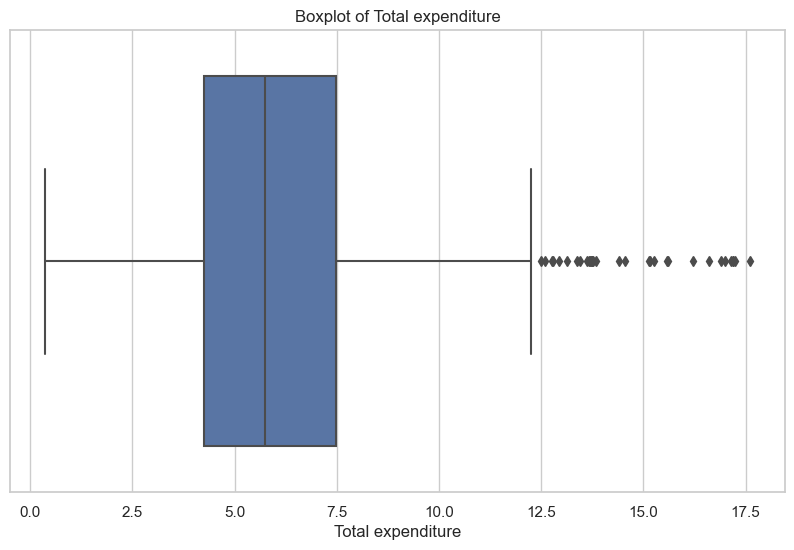

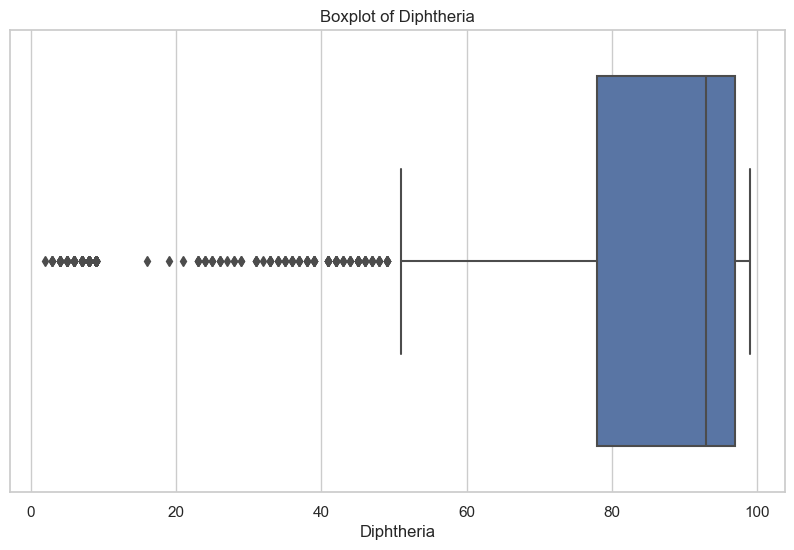

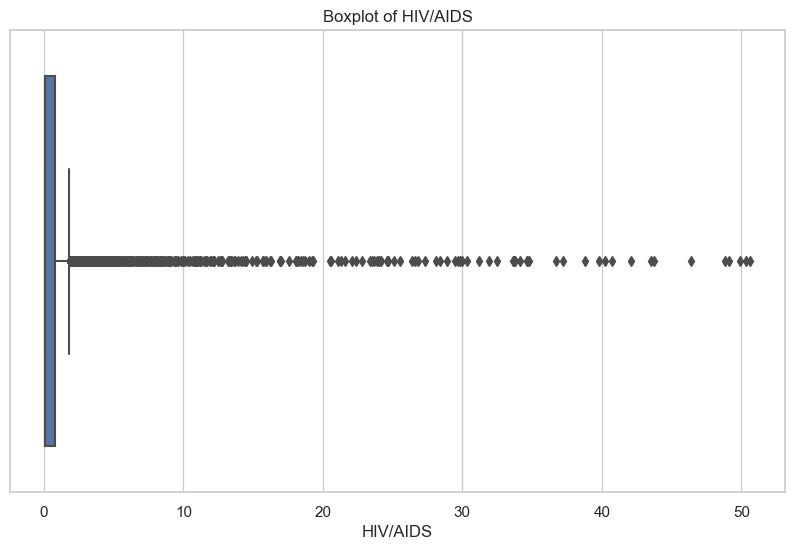

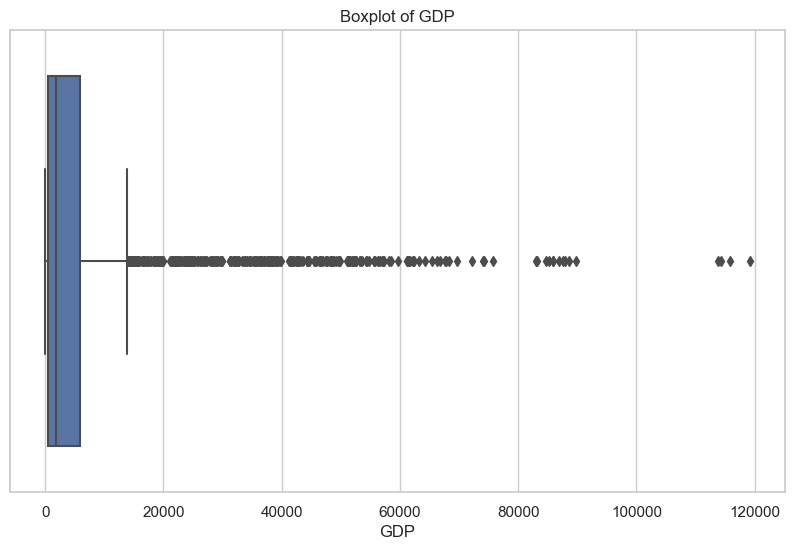

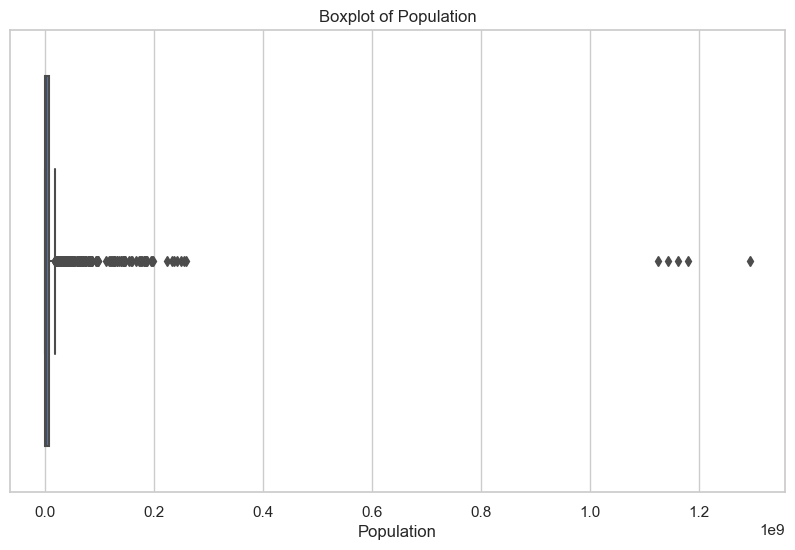

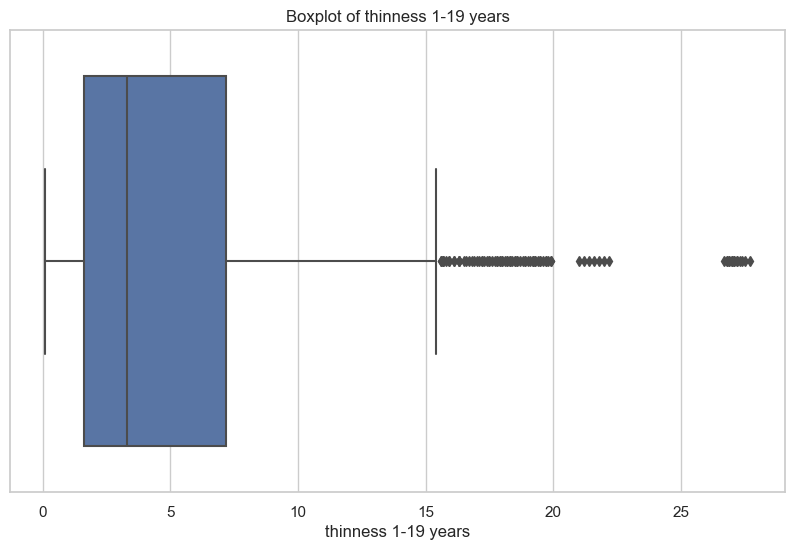

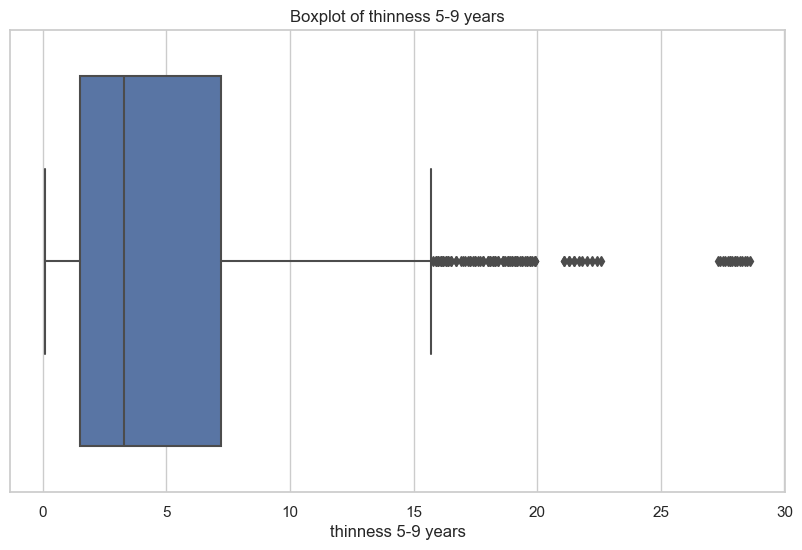

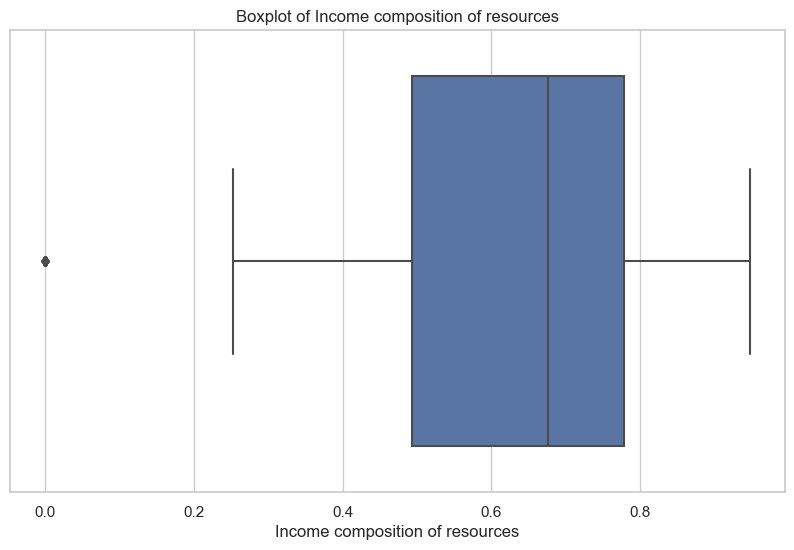

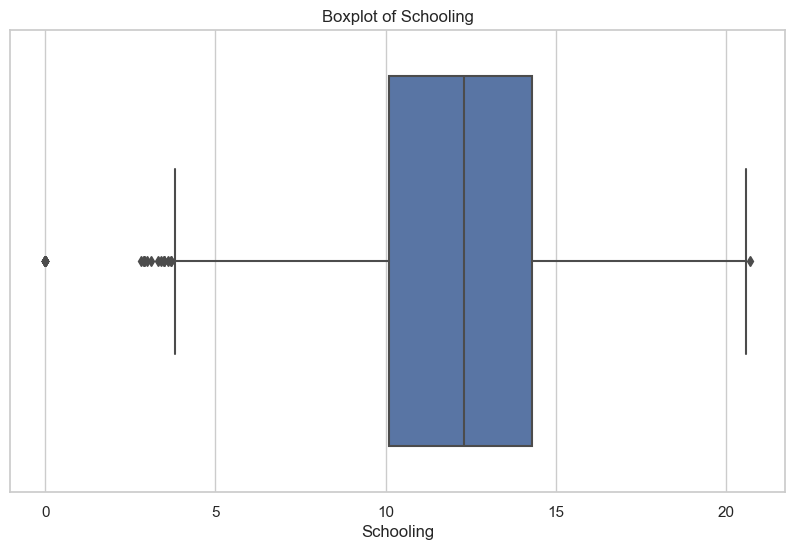

In [5]:
# Boxplot для кожного фактора
for column in lifex_columns[3:]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=lifex[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Variance:
Life expectancy                    9.070405e+01
 Adult Mortality                   1.544852e+04
infant deaths                      1.390666e+04
Alcohol                            1.642205e+01
percentage expenditure             3.951805e+06
Hepatitis B                        6.285057e+02
Measles                            1.314983e+08
BMI                                4.017633e+02
under-five deaths                  2.574277e+04
Polio                              5.488733e+02
Total expenditure                  6.241601e+00
Diphtheria                         5.624919e+02
HIV/AIDS                           2.578390e+01
GDP                                2.036377e+08
Population                         3.722476e+15
thinness 1-19 years                1.953812e+01
thinness 5-9 years                 2.033002e+01
Income composition of resources    4.448031e-02
Schooling                          1.128234e+01
dtype: float64


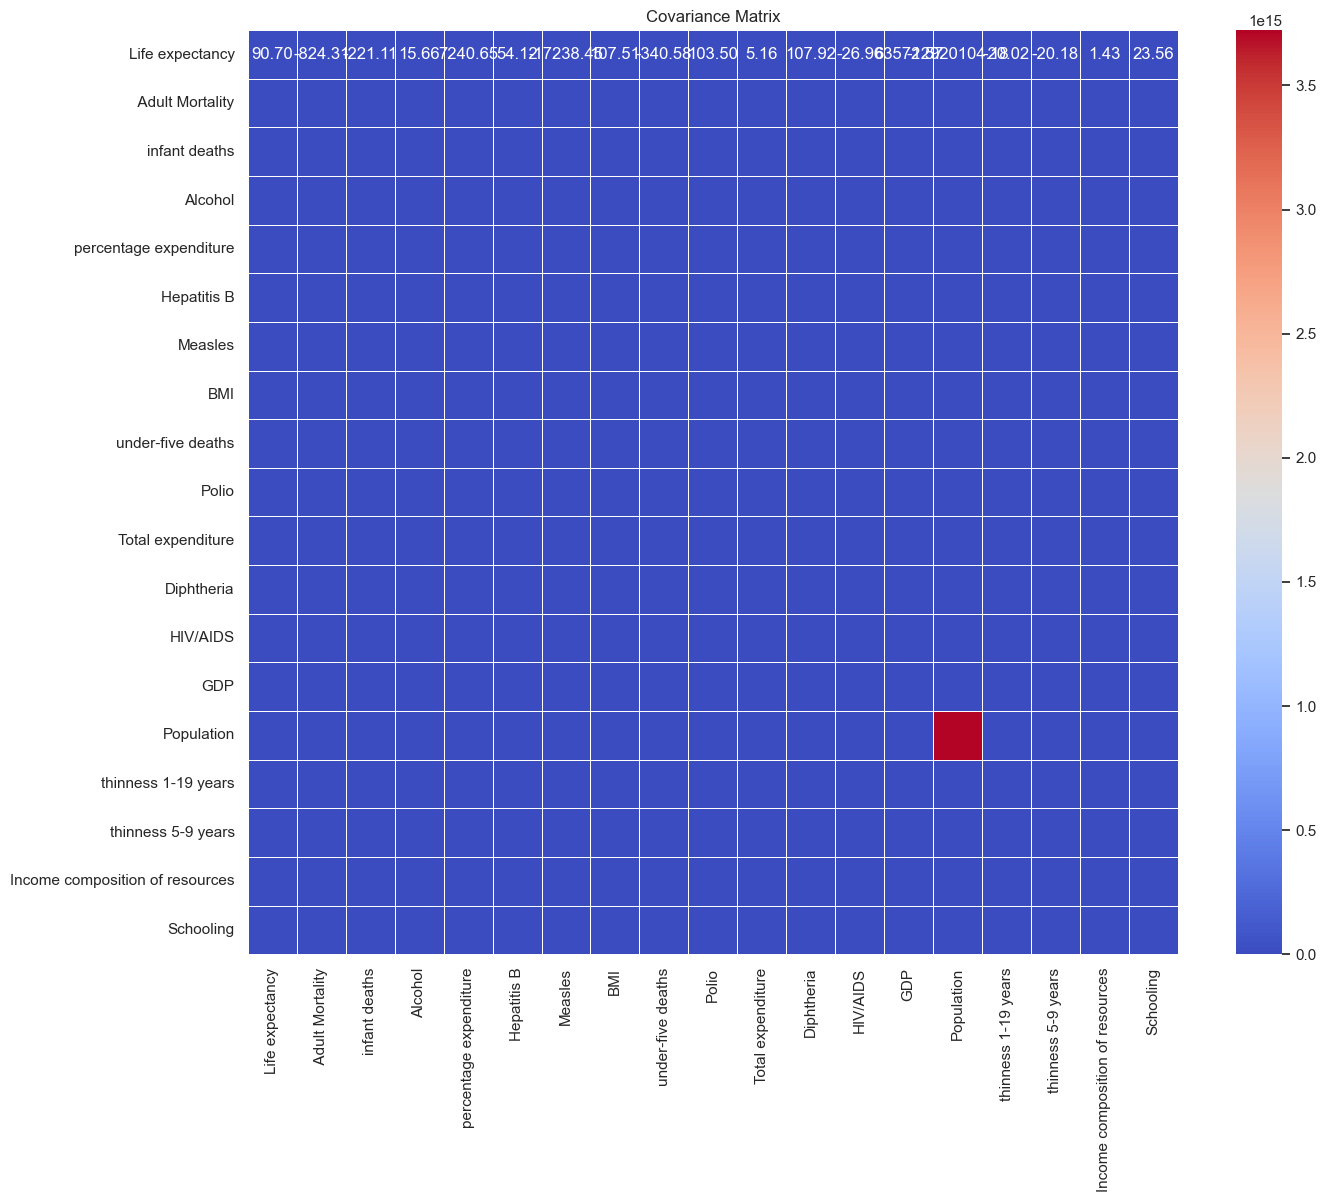

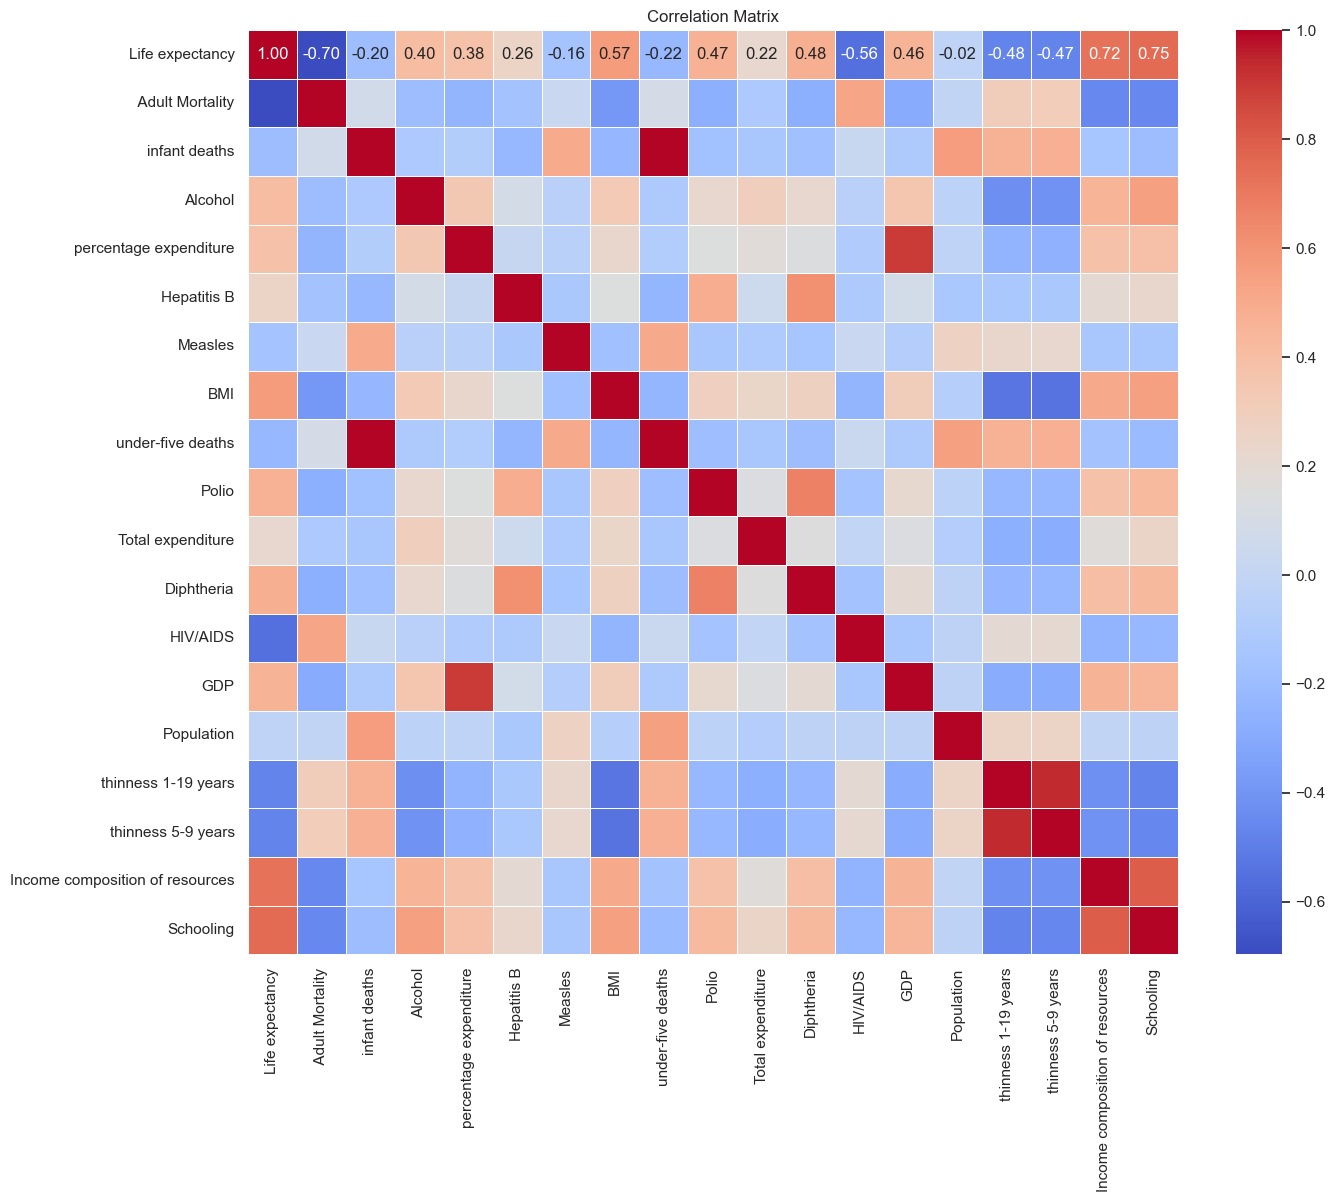

In [6]:
# Обчислення дисперсії, коваріації та кореляції
variance = lifex[lifex_columns[3:]].var()
covariance_matrix = lifex[lifex_columns[3:]].cov()
correlation_matrix = lifex[lifex_columns[3:]].corr()

# Виведення результатів
print("\nVariance:")
print(variance)
plt.figure(figsize=(15, 12))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix')
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

a. Чи справді різні фактори прогнозування, які були обрані спочатку, впливають на очікувану тривалість життя? Які передбачувані змінні насправді впливають на тривалість життя? 
Так, всі фактори впливають на тривалість життя, але по різному. Як можна побачити на heatmap внизу, найбільший вплив мають освіта, ICOR та BMI

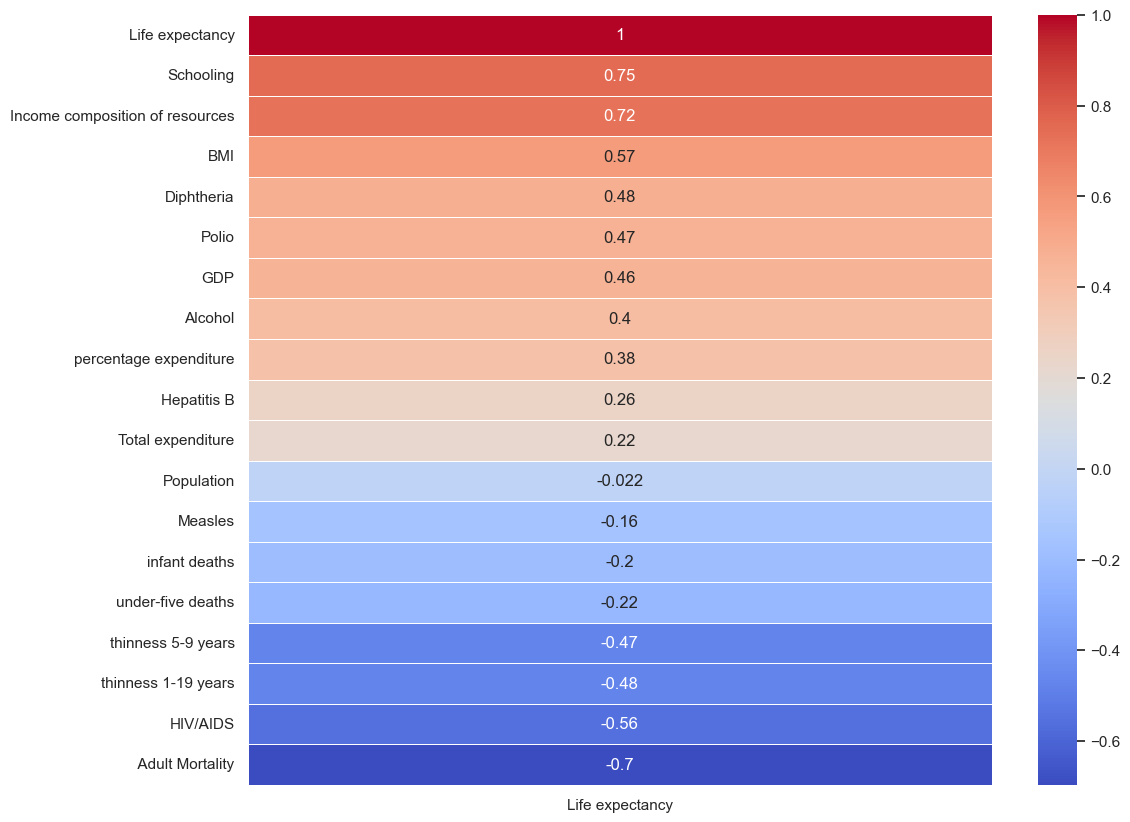

In [8]:
correlation_matrix = lifex[lifex_columns[3:]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

b. Чи повинна країна з нижчим значенням очікуваної тривалості життя (<65) збільшити витрати на охорону здоров’я, щоб покращити середню тривалість життя?
Як ми можемо бачити на графіку знизу витрати на охорону здоров'я не мають суттєвого впливу на середню тривалість життя

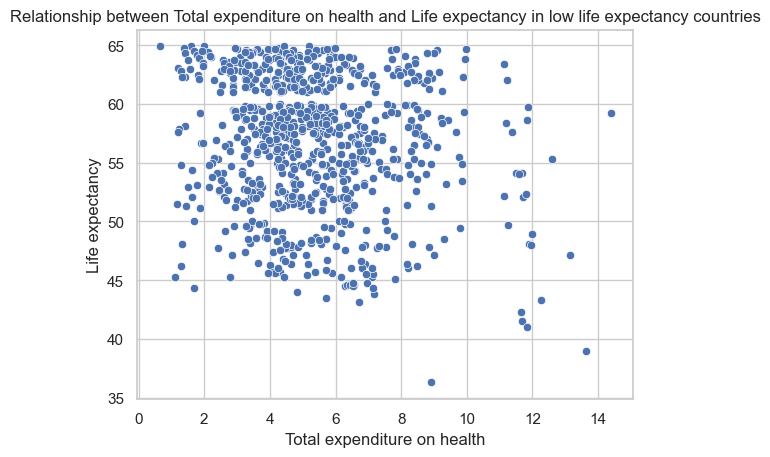

In [9]:
low_life_expectancy_countries = lifex[lifex['Life expectancy'] < 65]
sns.scatterplot(x='Total expenditure', y='Life expectancy', data=low_life_expectancy_countries)
plt.xlabel('Total expenditure on health')
plt.ylabel('Life expectancy')
plt.title('Relationship between Total expenditure on health and Life expectancy in low life expectancy countries')
plt.show()

c. Як рівень дитячої та дорослої смертності впливає на тривалість життя?
Доросла смертність негативно впливає на тривалість життя, дитяча також не сприяє тривалості життя, але не є настільки значущою

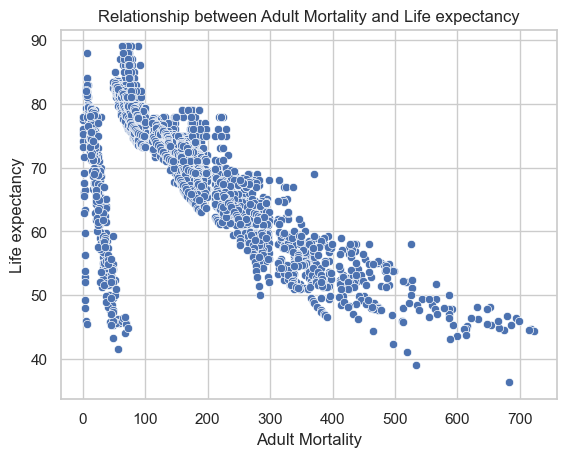

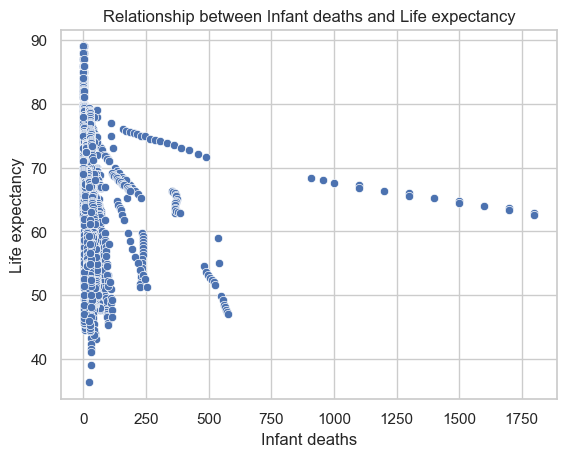

In [11]:
sns.scatterplot(x=' Adult Mortality', y='Life expectancy', data=lifex)
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')
plt.title('Relationship between Adult Mortality and Life expectancy')
plt.show()

sns.scatterplot(x='infant deaths', y='Life expectancy', data=lifex)
plt.xlabel('Infant deaths')
plt.ylabel('Life expectancy')
plt.title('Relationship between Infant deaths and Life expectancy')
plt.show()

d. Чи має очікувана тривалість життя позитивну чи негативну кореляцію зі звичками в їжі, способом життя, фізичними вправами, курінням, вживанням алкоголю тощо.
Очікувана тривалість життя має позитивну кореляцію з освітою звичками в їжі, способом життя, фізичними вправами та, як не дивно, алкоголем

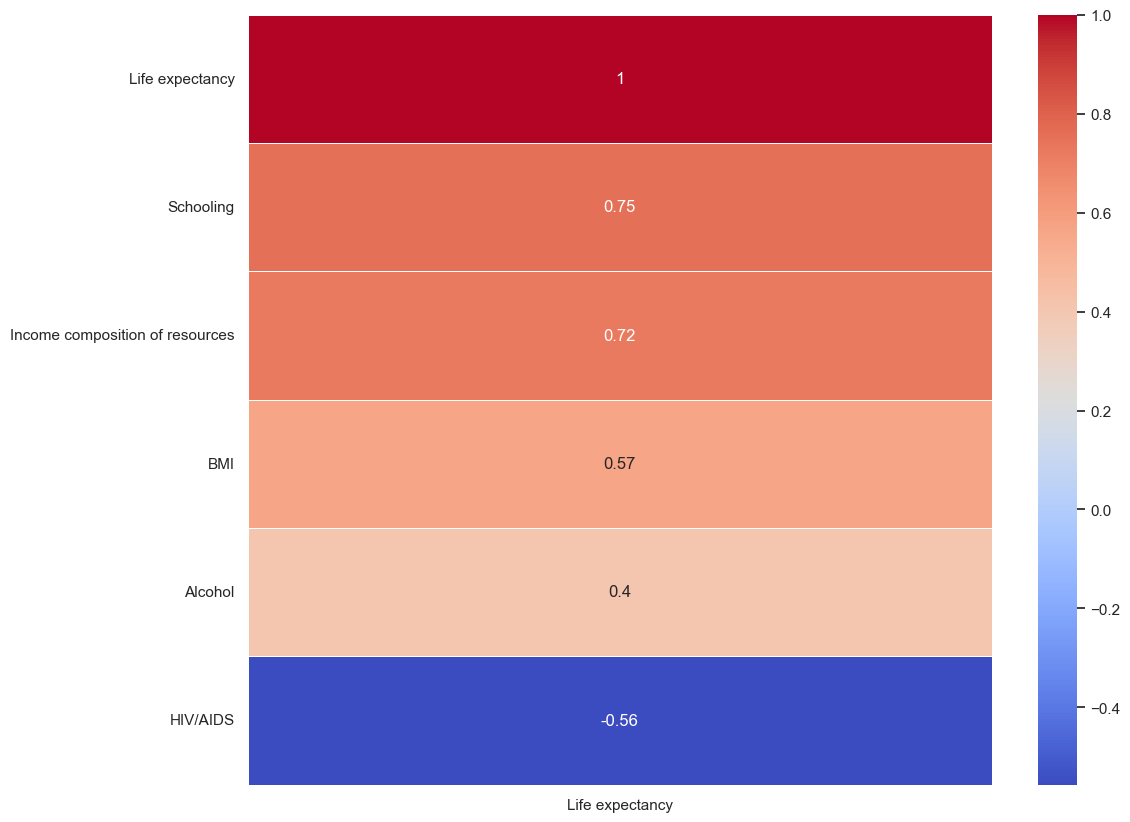

In [13]:
selected_lifestyle_columns = ['BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling', 'Alcohol']
lifestyle_correlation_matrix = lifex[selected_lifestyle_columns + ['Life expectancy']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(lifestyle_correlation_matrix[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

e. Який вплив навчання в школі на тривалість життя людини?
Навчання в школі має найбільш значний та позитивний вплив на тривалість життя людини

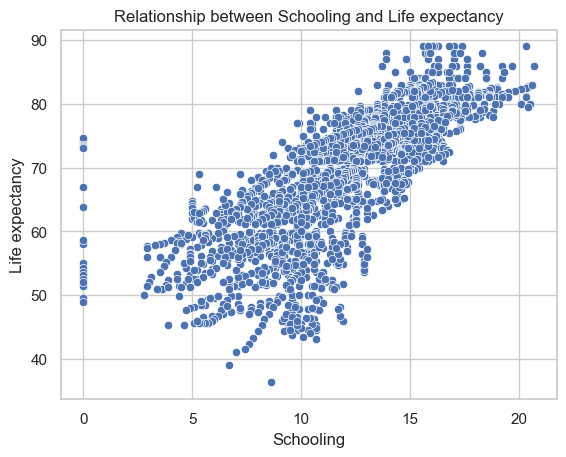

In [14]:
sns.scatterplot(x='Schooling', y='Life expectancy', data=lifex)
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.title('Relationship between Schooling and Life expectancy')
plt.show()

f. Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?
Це важко визначити, проте з графіку можна сказати, що він більше позитивний ніж негативний

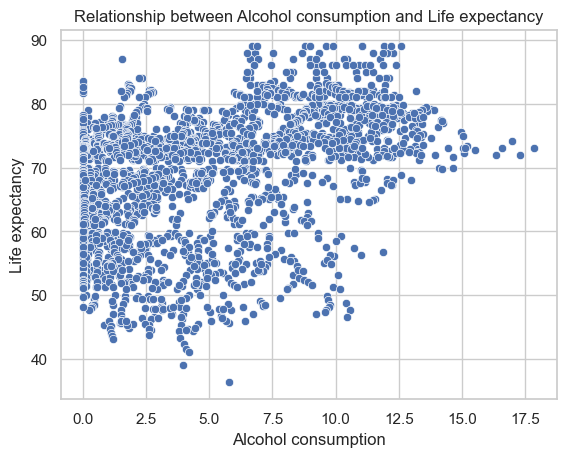

In [16]:
sns.scatterplot(x='Alcohol', y='Life expectancy', data=lifex)
plt.xlabel('Alcohol consumption')
plt.ylabel('Life expectancy')
plt.title('Relationship between Alcohol consumption and Life expectancy')
plt.show()

g. Чи зазвичай у густонаселених країнах тривалість життя нижча?
Густота населення майже ніяк не впливає на тривалість життя

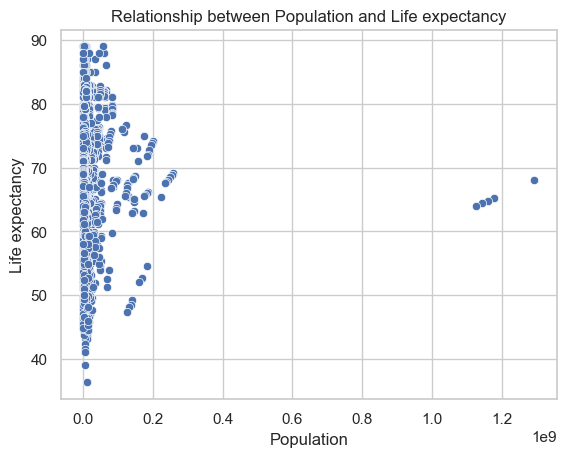

In [17]:
sns.scatterplot(x='Population', y='Life expectancy', data=lifex)
plt.xlabel('Population')
plt.ylabel('Life expectancy')
plt.title('Relationship between Population and Life expectancy')
plt.show()

h. Який вплив охоплення імунізацією на очікувану тривалість життя?
Він більше позитивний, але не є значним, найменший вплив має імунізація від кору

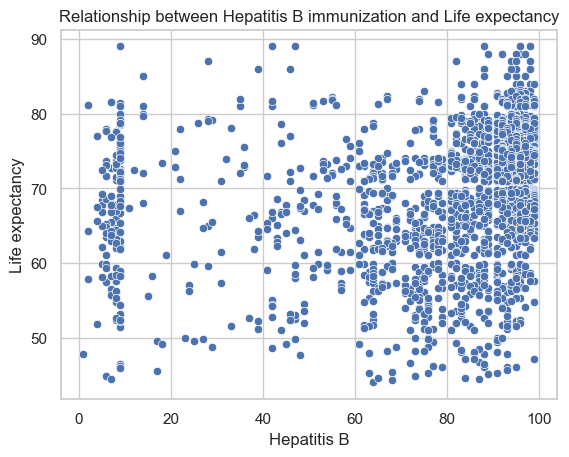

In [18]:
sns.scatterplot(x='Hepatitis B', y='Life expectancy', data=lifex)
plt.xlabel('Hepatitis B')
plt.ylabel('Life expectancy')
plt.title('Relationship between Hepatitis B immunization and Life expectancy')
plt.show()

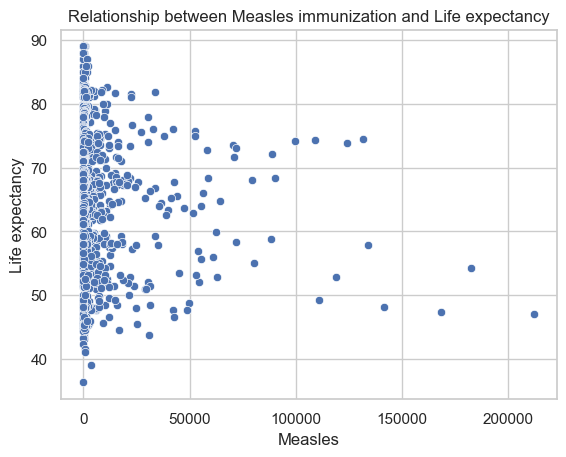

In [19]:
sns.scatterplot(x='Measles', y='Life expectancy', data=lifex)
plt.xlabel('Measles')
plt.ylabel('Life expectancy')
plt.title('Relationship between Measles immunization and Life expectancy')
plt.show()

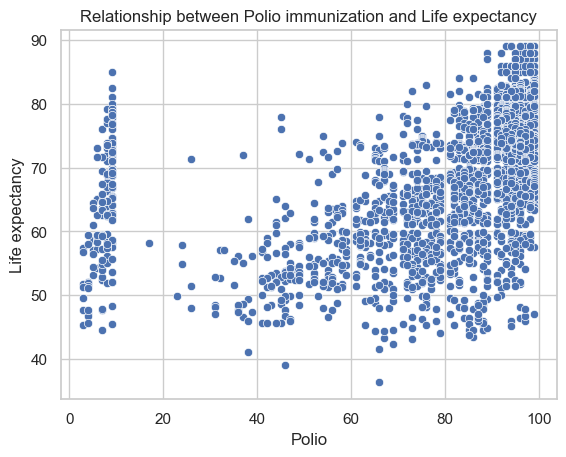

In [20]:
sns.scatterplot(x='Polio', y='Life expectancy', data=lifex)
plt.xlabel('Polio')
plt.ylabel('Life expectancy')
plt.title('Relationship between Polio immunization and Life expectancy')
plt.show()

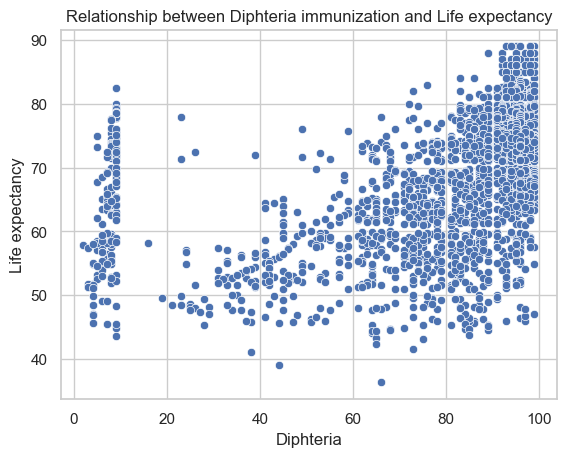

In [23]:
sns.scatterplot(x='Diphtheria', y='Life expectancy', data=lifex)
plt.xlabel('Diphteria')
plt.ylabel('Life expectancy')
plt.title('Relationship between Diphteria immunization and Life expectancy')
plt.show()